In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [2]:
headers = {"Accept-Language": "en-US,en;q=0.5"}

In [3]:
movie_name = []
year = []
rating = []
time = []
genre = []
imdb_rating = []
metascore = []

In [4]:
pages = np.arange(1,2000,50)

In [5]:
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?companies=co0144901&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))
    
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
    
        year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '') 
        year.append(year_of_release)
    
        certificate = store.p.find('span', class_ = 'certificate').text if store.p.find('span', class_ = 'certificate') else '*'
        rating.append(certificate)
    
        runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '') if store.p.find('span', class_ = 'runtime') else '*'
        time.append(runtime)
    
        gen = store.p.find('span', class_ = 'genre').text.replace('\n','') if store.p.find('span', class_ = 'genre') else '*'
        genre.append(gen)
    
        rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '') if store.find('div', class_ = 'inline-block ratings-imdb-rating') else '*'
        imdb_rating.append(rate)
    
        meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '*'
        metascore.append(meta)

In [25]:
movie_DF = pd.DataFrame({'Name': movie_name, 'Year': year, 'Rating':rating, 'Watchtime':time, 'Genre':genre, 'IMDb Rating': imdb_rating, 'Metascore': metascore})
movie_DF

,Name,Year,Rating,Watchtime,Genre,IMDb Rating,Metascore
0,Glass Onion,2022,PG-13,139,"Comedy, Crime, Drama",7.2,81
1,Kaleidoscope,2023,TV-MA,47,"Action, Crime, Drama",6.9,*
2,Wednesday,2022–,TV-14,45,"Comedy, Crime, Fantasy",8.2,*
3,White Noise,I 2022,R,136,"Comedy, Drama, Horror",5.7,66
4,The Pale Blue Eye,2022,R,128,"Crime, Horror, Mystery",6.7,56
...,...,...,...,...,...,...,...
1995,"Love, Guaranteed",2020,TV-PG,90,"Comedy, Romance",5.6,39
1996,Seoul Vibe,2022,TV-MA,138,"Action, Comedy, Crime",5.5,*
1997,The Good Detective,2020–2022,*,60,"Action, Drama, Mystery",7.5,*
1998,Skylines,2020,R,113,"Action, Adventure, Sci-Fi",4.7,46


In [7]:
movie_DF.to_csv("Netflix_IMDb_2000.csv")

In [8]:
from matplotlib import pyplot as plt

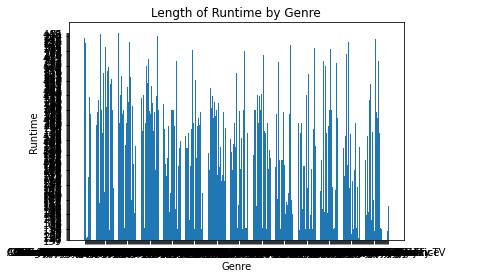

In [9]:
plt.bar(movie_DF.Genre, movie_DF.Watchtime,)
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.title('Length of Runtime by Genre')
plt.rcParams['figure.figsize'] = (10,6)
plt.show()


In [10]:
TV_MA = movie_DF[movie_DF.Rating =='TV-MA']
TV_14 = movie_DF[movie_DF.Rating =='TV-14']
TV_Y = movie_DF[movie_DF.Rating =='TV-Y']
TV_Y7 = movie_DF[movie_DF.Rating =='TV-Y7']
TV_PG = movie_DF[movie_DF.Rating =='TV-PG']
TV_G = movie_DF[movie_DF.Rating =='TV-G']


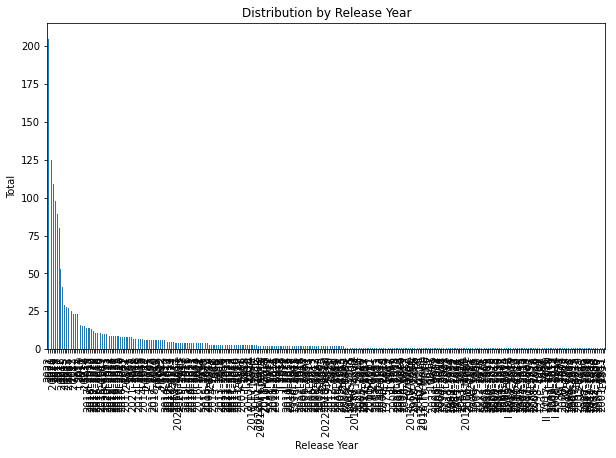

In [11]:
#Chart representing distribution by year for each piece of content.
movie_DF['Year'].value_counts().plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Total')
plt.title('Distribution by Release Year')
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

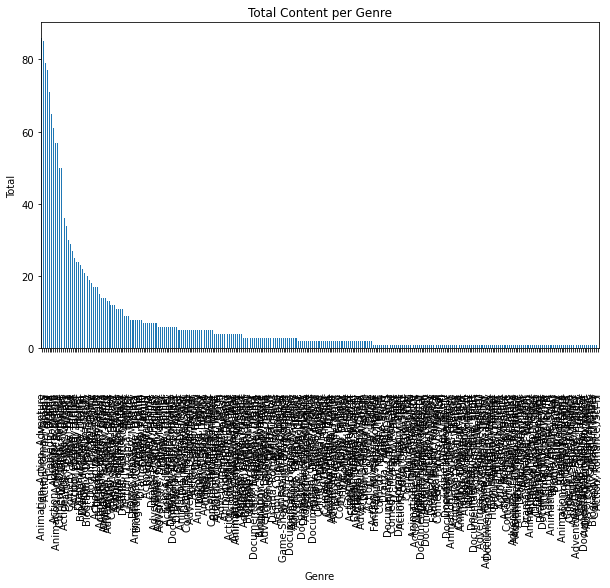

In [12]:
#Chart representing the amount of Genre for each piece of content. Pls note, IMDb labels genre in the html code as having upto 3 genres as 1, unfortunately makes x-axis more difficult to read.

movie_DF['Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total')
plt.title('Total Content per Genre')
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

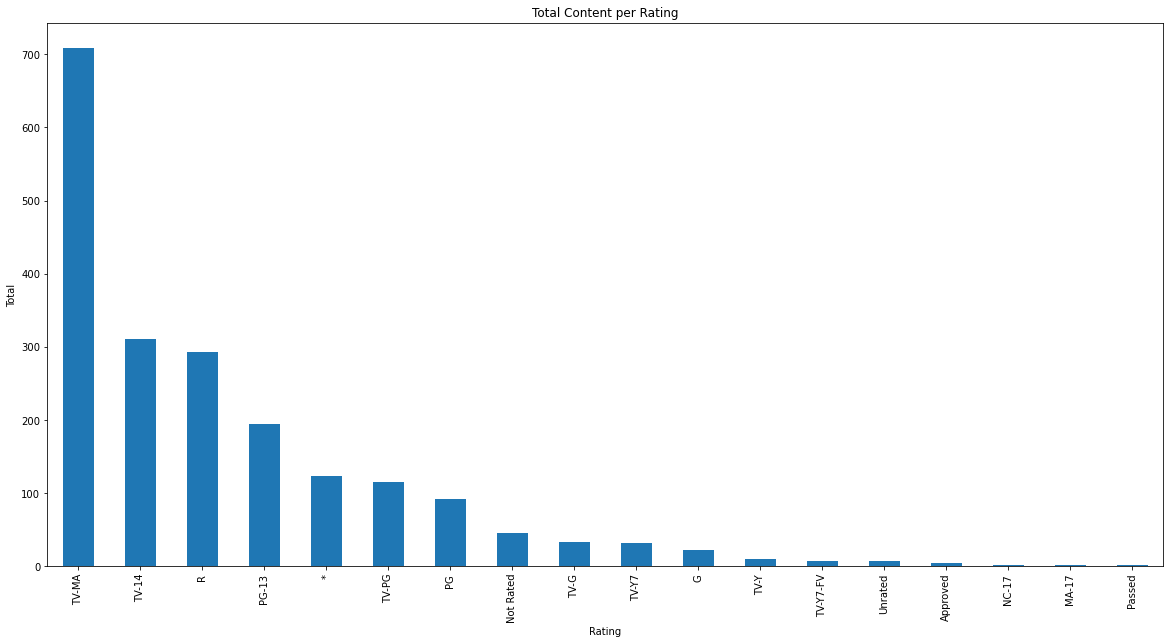

In [13]:
#Chart representing the amount of Ratings for each piece of content
movie_DF['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title('Total Content per Rating')
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

In [33]:
movie_DF['Popularity Rank'] = movie_DF.reset_index().index

In [34]:
movie_DF.rename(columns={0 :'Popularity Rank'}, inplace=True)

In [35]:
print(movie_DF.columns.tolist())

['Name', 'Year', 'Rating', 'Watchtime', 'Genre', 'IMDb Rating', 'Metascore', 'row_number', 'Popularity Rank']


In [31]:
type('Popularity Rank')

str

In [43]:
iy=movie_DF['IMDb Rating'].to_numpy()

In [44]:
px=movie_DF ['Popularity Rank'].to_numpy()

Text(0.5, 1.0, 'IMDb Rating vs. Popularity Rank')

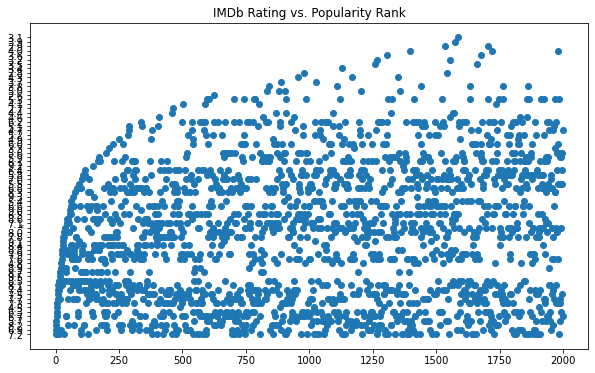

In [48]:
plt.plot(px,iy,'o');
plt.title('IMDb Rating vs. Popularity Rank')

In [46]:
my=movie_DF ['Metascore'].to_numpy()

Text(0.5, 1.0, 'IMDb vs Metascore')

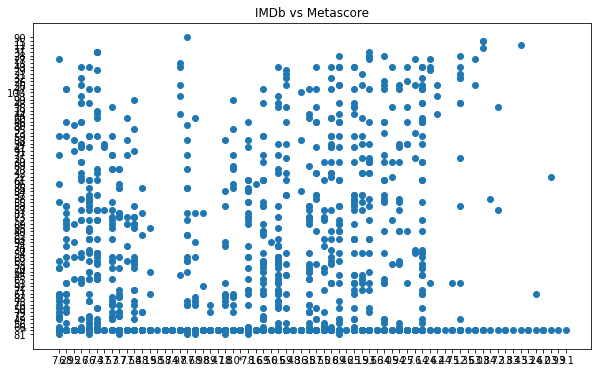

In [49]:
#IMDb vs Metascore
plt.plot(iy,my,'o')
plt.title('IMDb vs Metascore')

Text(0.5, 1.0, 'Categories by Motion Picture Rating')

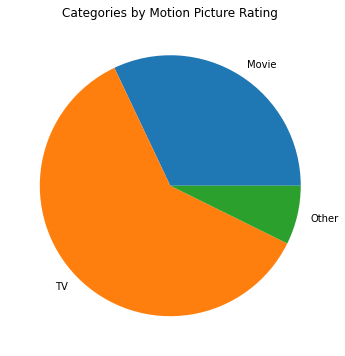

In [52]:
c = np.array([32.05, 60.65, 7.3])
labels = ['Movie', 'TV', 'Other']
plt.pie(c, labels = labels)
plt.title('Categories by Motion Picture Rating')